# Network Analysis with NetworkX

In this notebook, we're going to learn about network analysis. Network analysis will help us better understand the complex relationships between groups of people in a network. In this case we are going to analyze fictional characters, namely the relationship of characters in Game of Thrones. 
The way we are going to analyze the network of game of thrones characters in Python is through a package called networkx, whichis able to calculate different network statistics.

### *Game of Thrones*

<blockquote class="epigraph" style=" padding: 10px">

Lucky it might be, and red it certainly was, but Ygritte’s hair was such a tangle that Jon was tempted to ask her if she only brushed it at the changing of the seasons.

-George R. R. Martin, *A Song of Ice and Fire*
</blockquote>

## Network Basics

## Install NetworkX

In [1]:
!pip install networkx

     |████████████████████████████████| 1.9 MB 4.7 MB/s            


## Import Libraries

In [2]:
import networkx
import pandas as pd
pd.set_option('max_rows', 400)
import matplotlib.pyplot as plt

## *Game of Thrones* Network

The network data that we're going to use in this lesson is taken from Andrew Beveridge and Jie Shan's paper, ["Network of Thrones."](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf)

These researchers calculated how many times each Game of Thrones character appeared within 15 words of another character in *A Storm of Swords*, the third book in the series.

For example, the following sentence counts as an "edge" or connection between Jon Snow & Sam Tarly and the subsequent sentence between Ygritte & Jon. The third sentence shows three names, thus this would result in three edges; one between Arya & Gendry, one between Arya & Jon and one between Gendry & Jon.

> "It was the bastard **Jon Snow** who had taken that from him, him and his fat friend **Sam Tarly**."

> "Lucky it might be, and red it certainly was, but **Ygritte**’s hair was such a tangle that **Jon** was tempted to ask her if she only brushed it at the changing of the seasons."

> "**Arya** gave **Gendry** a sideways look. *He said it with me, like **Jon** used to do, back in Winterfell.* She missed **Jon Snow** the most of all her brothers.""

We could visualize this network by drawing each GoT character as a dot on a map, this is what we call a _Node_. When the characters are mentioned within 15 words of each other, a certain relationship exist between the characters, thus we could draw a line / link between these dots, called an _edge_ in network analysis. By counting the amount of times Game of Thrones characters are mentioned within 15 words of each others, we can determine how important the relationship between those characters is, this is giving a _weight_ to each edge. See an overview of these network terms in the table below. 

| Network Element      | GOT |         
| :-------------: |:-------------:| 
| Node    | GOT character | 
| Edge     | Mutually mentioned within 15 words      | 
| Weight   | Amount of times characters are mentioned with each other |

Luckily for us, Andrew and Jie already counted the amount of times (weight) each character (node) is mentioned (edge) with each other character and stored that in an easy-to-read csv-file. Let's open up this file and visualize the network.

In [ ]:
got_df = pd.read_csv('../../data/processed/GoT/got-edges.csv')

In [4]:
got_df

Source        Target  Weight
0           Aemon         Grenn       5
1           Aemon       Samwell      31
2           Aerys         Jaime      18
3           Aerys        Robert       6
4           Aerys        Tyrion       5
5           Aerys         Tywin       8
6         Alliser         Mance       5
7           Amory        Oberyn       5
8            Arya         Anguy      11
9            Arya         Beric      23
10           Arya          Bran       9
11           Arya       Brynden       6
12           Arya        Cersei       5
13           Arya        Gendry      43
14           Arya        Gregor       7
15           Arya         Jaime      11
16           Arya       Joffrey       6
17           Arya           Jon       7
18           Arya        Rickon       8
19           Arya        Robert       4
20           Arya         Roose       5
21           Arya        Sandor      46
22           Arya        Thoros      18
23           Arya        Tyrion       5
24          Balon         Loras       4
25         Belwas     Barristan      18
26         Belwas       Illyrio      10
27          Beric         Anguy       4
28          Beric        Gendry       4
29          Beric        Thoros      21
30           Bran         Hodor      96
31           Bran         Jojen      46
32           Bran           Jon      12
33           Bran         Luwin       4
34           Bran         Meera      54
35           Bran           Nan      14
36           Bran        Rickon      35
37           Bran       Samwell      11
38           Bran         Theon      11
39        Brienne         Loras       7
40          Bronn        Gregor       5
41          Bronn       Podrick      19
42        Brynden        Lothar       4
43        Brynden        Walder       5
44        Catelyn          Bran       4
45        Catelyn       Brienne       7
46        Catelyn       Brynden       8
47        Catelyn        Cersei       4
48        Catelyn        Edmure      16
49        Catelyn        Hoster       9
50        Catelyn         Jaime      19
51        Catelyn         Jeyne      10
52        Catelyn          Lysa       8
53        Catelyn         Petyr       5
54        Catelyn          Robb      43
55        Catelyn         Roose       4
56        Catelyn        Roslin       6
57        Catelyn         Sansa       8
58        Catelyn       Stannis       4
59        Catelyn        Tyrion       5
60        Catelyn        Walder      19
61         Cersei       Brienne       5
62         Cersei         Bronn       4
63         Cersei          Elia       4
64         Cersei        Gregor       6
65         Cersei          Ilyn       7
66         Cersei         Jaime      36
67         Cersei       Joffrey      23
68         Cersei         Meryn      10
69         Cersei       Pycelle       4
70         Cersei        Robert      16
71         Cersei        Sandor       6
72         Cersei          Shae       4
73         Cersei        Tyrion      46
74         Cersei         Varys       4
75        Craster          Karl       6
76         Daario         Drogo       4
77         Daario          Irri       5
78       Daenerys         Aegon       8
79       Daenerys     Barristan      20
80       Daenerys        Belwas      26
81       Daenerys        Daario      14
82       Daenerys         Drogo      18
83       Daenerys          Irri      17
84       Daenerys         Jorah      47
85       Daenerys       Kraznys      10
86       Daenerys     Missandei      26
87       Daenerys       Rakharo       7
88       Daenerys       Rhaegar      12
89       Daenerys        Robert       5
90       Daenerys       Viserys       8
91       Daenerys          Worm      14
92          Davos       Cressen       4
93          Davos     Salladhor      16
94         Eddard          Arya      18
95         Eddard         Beric       8
96         Eddard          Bran      15
97         Eddard       Catelyn       5
98         Eddard        Cersei       6
99         

## Create a Network From a Pandas DataFrame

We can directly insert this data into networkx, providing the weight of the edge between each pair of GoT characters.

In [5]:
G = networkx.from_pandas_edgelist(got_df, 'Source', 'Target', 'Weight')

In [6]:
networkx.write_graphml(G, 'GOT-network.graphml')

## Draw a Simple Network

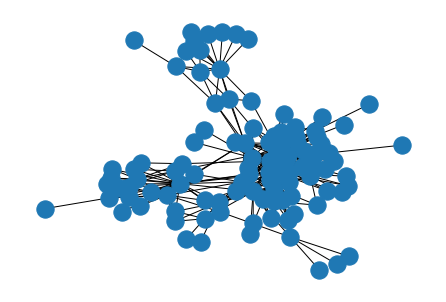

In [7]:
networkx.draw(G)

Now we visualized this network, but we can barely see anything, so let's run a more elaborate visualization.

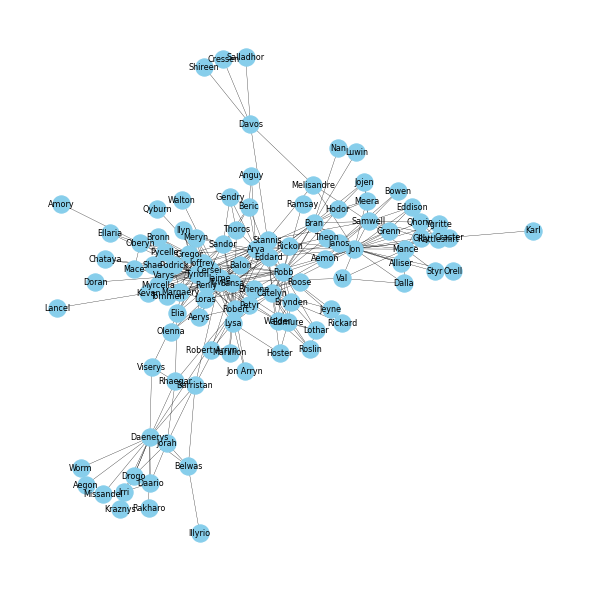

In [8]:
plt.figure(figsize=(8,8))
networkx.draw(G, with_labels=True, node_color='skyblue', width=.3, font_size=8)

## Network analysis

Awesome! We just visualized every (important) GoT character from book III as a network. However, you might wonder how this network was construed, what determined the configuration of this network as we can see above?

This leads us to a more elaborate network analysis, the individual components of which may be interesting to calculate in their own right. We will address the following four components:

* Degree
* Weighted degree
* Betweenness
* Communities

Let's start off with the first component: Degree. 
The degree of a network is the amount of connections every node (character) has in a network. The more connections (mentions within 15 words of different characters) a character has, the more linked this character is within the network. Networkx already calculated the degree when we inserted the dataframe.

In [43]:
networkx.degree(G)

DegreeView({'Aemon': 5, 'Grenn': 4, 'Samwell': 15, 'Aerys': 4, 'Jaime': 24, 'Robert': 18, 'Tyrion': 36, 'Tywin': 22, 'Alliser': 3, 'Mance': 12, 'Amory': 1, 'Oberyn': 7, 'Arya': 19, 'Anguy': 2, 'Beric': 6, 'Bran': 14, 'Brynden': 8, 'Cersei': 20, 'Gendry': 4, 'Gregor': 12, 'Joffrey': 18, 'Jon': 26, 'Rickon': 6, 'Roose': 4, 'Sandor': 13, 'Thoros': 5, 'Balon': 6, 'Loras': 9, 'Belwas': 4, 'Barristan': 6, 'Illyrio': 1, 'Hodor': 4, 'Jojen': 4, 'Luwin': 2, 'Meera': 5, 'Nan': 2, 'Theon': 4, 'Brienne': 7, 'Bronn': 4, 'Podrick': 5, 'Lothar': 5, 'Walder': 8, 'Catelyn': 18, 'Edmure': 8, 'Hoster': 3, 'Jeyne': 2, 'Lysa': 10, 'Petyr': 7, 'Robb': 25, 'Roslin': 4, 'Sansa': 26, 'Stannis': 14, 'Elia': 5, 'Ilyn': 6, 'Meryn': 7, 'Pycelle': 4, 'Shae': 5, 'Varys': 7, 'Craster': 5, 'Karl': 1, 'Daario': 4, 'Drogo': 4, 'Irri': 4, 'Daenerys': 14, 'Aegon': 1, 'Jorah': 6, 'Kraznys': 1, 'Missandei': 2, 'Rakharo': 1, 'Rhaegar': 6, 'Viserys': 3, 'Worm': 1, 'Davos': 5, 'Cressen': 1, 'Salladhor': 1, 'Eddard': 12, 'Eddis

Make the degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [10]:
degrees = dict(networkx.degree(G))
networkx.set_node_attributes(G, name='degree', values=degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='degree')`, then sort from highest to lowest, who has the most number of connections in the network?

In [11]:
degree_df = pd.DataFrame(G.nodes(data='degree'), columns=['node', 'degree'])
degree_df = degree_df.sort_values(by='degree', ascending=False)
degree_df

node  degree
6          Tyrion      36
21            Jon      26
50          Sansa      26
48           Robb      25
4           Jaime      24
7           Tywin      22
17         Cersei      20
12           Arya      19
42        Catelyn      18
5          Robert      18
20        Joffrey      18
2         Samwell      15
63       Daenerys      14
15           Bran      14
51        Stannis      14
24         Sandor      13
9           Mance      12
75         Eddard      12
19         Gregor      12
46           Lysa      10
27          Loras       9
16        Brynden       8
41         Walder       8
43         Edmure       8
79          Renly       8
37        Brienne       7
54          Meryn       7
57          Varys       7
47          Petyr       7
84       Margaery       7
11         Oberyn       7
29      Barristan       6
69        Rhaegar       6
83          Kevan       6
81          Janos       6
14          Beric       6
53           Ilyn       6
22         Rickon       6
26          Balon       6
65          Jorah       6
52           Elia       5
56           Shae       5
58        Craster       5
72          Davos       5
89         Qhorin       5
80         Tommen       5
0           Aemon       5
40         Lothar       5
39        Podrick       5
34          Meera       5
25         Thoros       5
77          Gilly       4
62           Irri       4
28         Belwas       4
93        Ygritte       4
90    Rattleshirt       4
23          Roose       4
85       Myrcella       4
31          Hodor       4
18         Gendry       4
32          Jojen       4
60         Daario       4
61          Drogo       4
3           Aerys       4
87     Melisandre       4
55        Pycelle       4
36          Theon       4
1           Grenn       4
38          Bronn       4
49         Roslin       4
92            Val       4
86          Dalla       3
44         Hoster       3
76        Eddison       3
98   Robert Arryn       3
70        Viserys       3
97      Marillion       3
100          Mace       3
8         Alliser       3
91           Styr       2
94      Jon Arryn       2
96         Olenna       2
99        Ellaria       2
101       Rickard       2
103       Chataya       2
45          Jeyne       2
13          Anguy       2
35            Nan       2
33          Luwin       2
82          Bowen       2
67      Missandei       2
10          Amory       1
66        Kraznys       1
105         Doran       1
104       Shireen       1
102        Ramsay       1
59           Karl       1
64          Aegon       1
68        Rakharo       1
95         Lancel       1
30        Illyrio       1
71           Worm       1
73        Cressen       1
74      Salladhor       1
78         Qyburn       1
88          Orell       1
106        Walton       1

## Calculate Weighted Degree

The weighted degree, as the term gives away, is the degree considering the weight associated with the connections. Thus, it is not only the amount of connections a GoT character has, but the amount of mentions of this character with others in total.

Who has the most number of connections in the network (if you factor in edge weight)?

In [ ]:
networkx.degree(G, weight='Weight')

Make the weighted degree values a `dict`ionary, then add it as a network "attribute" with `networkx.set_node_attributes()`

In [ ]:
weighted_degrees = dict(networkx.degree(G, weight='Weight'))
networkx.set_node_attributes(G, name='weighted_degree', values=weighted_degrees)

Make a Pandas dataframe from the degree data `G.nodes(data='weighted_degree')`, then sort from highest to lowest

In [ ]:
weighted_degree_df = pd.DataFrame(G.nodes(data='weighted_degree'), columns=['node', 'weighted_degree'])
weighted_degree_df = weighted_degree_df.sort_values(by='weighted_degree', ascending=False)
weighted_degree_df

## Calculate Betweenness Centrality Scores

The betweenness score is a bit harder to understand, but a very intriguing statistic and might be of interest to you in your own research. Try to envision the following scenario: If I have a certain node **X** in a network and I would map the shortest paths between every node with every other node in the network, how many of those paths would cross node **X**? This (calculated as a factor) is the betweenness centrality score of node **X** in the network.

A small example here: let's say we don't know each other, but you and I both know Tom (Ha, good old Tom). In that case, if you would try to reach me, you would ask Tom for my information and vica versa, thus Tom has a score of 1 betweenness in this network. Yet, Tom can both reach me as well as you without asking one of us for the information of the other. Thus; we do not connect anyone with someone else in this network, our betweenness scores would be 0.

Here is the simplified formula for the betweenness centrality score:
(Betweenness node X) = (Total number of shortest paths between every pair of nodes crossing node X) / (Total number of shortest paths between every pair of nodes)

One step further is to include weights into the betweenness score. Let's say that we also both know Jamila (you still remember, right?) and me and Jamila call 10 times a week, but I only saw Tom an half year ago, then you would likely ask Jamila for my information and not Tom.

Let's calculate this betweenness, who connects the most other nodes in the network?

In [18]:
betweenness_centrality = networkx.betweenness_centrality(G)

Add `betweenness_centrality` (which is already a dictionary) as a network "attribute" with `networkx.set_node_attributes()`

In [19]:
networkx.set_node_attributes(G, name='betweenness', values=betweenness_centrality)

Make a Pandas dataframe from the betweenness data `G.nodes(data='betweenness')`, then sort from highest to lowest

In [20]:
betweenness_df = pd.DataFrame(G.nodes(data='betweenness'), columns=['node', 'betweenness'])
betweenness_df = betweenness_df.sort_values(by='betweenness', ascending=False)
betweenness_df

node  betweenness
21            Jon     0.229965
5          Robert     0.209452
6          Tyrion     0.197913
63       Daenerys     0.157203
48           Robb     0.126964
50          Sansa     0.126720
51        Stannis     0.102700
4           Jaime     0.099943
12           Arya     0.079607
7           Tywin     0.065538
15           Bran     0.063017
72          Davos     0.056065
42        Catelyn     0.048906
29      Barristan     0.040114
2         Samwell     0.032273
17         Cersei     0.026746
20        Joffrey     0.025434
81          Janos     0.023559
11         Oberyn     0.019580
75         Eddard     0.019341
83          Kevan     0.019220
28         Belwas     0.018868
58        Craster     0.018868
70        Viserys     0.015644
46           Lysa     0.015215
24         Sandor     0.014162
87     Melisandre     0.008609
69        Rhaegar     0.007313
9           Mance     0.007276
43         Edmure     0.006317
92            Val     0.005898
19         Gregor     0.005880
16        Brynden     0.004727
0           Aemon     0.004623
79          Renly     0.004228
27          Loras     0.003781
41         Walder     0.003273
52           Elia     0.002997
65          Jorah     0.002330
31          Hodor     0.002194
34          Meera     0.001992
25         Thoros     0.001926
37        Brienne     0.001538
56           Shae     0.001252
47          Petyr     0.001150
84       Margaery     0.001097
57          Varys     0.000909
39        Podrick     0.000836
22         Rickon     0.000763
80         Tommen     0.000698
40         Lothar     0.000660
26          Balon     0.000628
85       Myrcella     0.000624
14          Beric     0.000609
94      Jon Arryn     0.000576
36          Theon     0.000472
32          Jojen     0.000406
89         Qhorin     0.000264
23          Roose     0.000263
54          Meryn     0.000259
44         Hoster     0.000243
62           Irri     0.000180
38          Bronn     0.000105
49         Roslin     0.000068
60         Daario     0.000060
61          Drogo     0.000060
1           Grenn     0.000060
97      Marillion     0.000000
102        Ramsay     0.000000
105         Doran     0.000000
100          Mace     0.000000
104       Shireen     0.000000
98   Robert Arryn     0.000000
86          Dalla     0.000000
103       Chataya     0.000000
88          Orell     0.000000
93        Ygritte     0.000000
96         Olenna     0.000000
90    Rattleshirt     0.000000
101       Rickard     0.000000
95         Lancel     0.000000
91           Styr     0.000000
99        Ellaria     0.000000
53           Ilyn     0.000000
82          Bowen     0.000000
55        Pycelle     0.000000
3           Aerys     0.000000
8         Alliser     0.000000
10          Amory     0.000000
13          Anguy     0.000000
18         Gendry     0.000000
30        Illyrio     0.000000
33          Luwin     0.000000
35            Nan     0.000000
45          Jeyne     0.000000
59           Karl     0.000000
78         Qyburn     0.000000
64          Aegon     0.000000
66        Kraznys     0.000000
67      Missandei     0.000000
68        Rakharo     0.000000
71           Worm     0.000000
73        Cressen     0.000000
74      Salladhor     0.000000
76        Eddison     0.000000
77          Gilly     0.000000
106        Walton     0.000000

Plot the nodes with the highest betweenness centrality scores

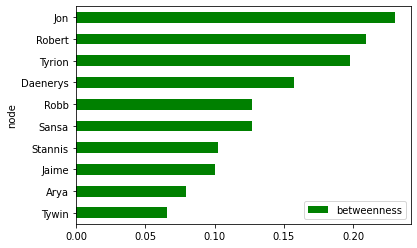

In [21]:
num_nodes_to_inspect = 10
betweenness_df[:num_nodes_to_inspect].plot(x='node', y='betweenness', color='green', kind='barh').invert_yaxis()

## Communities

Last but not least, is it possible to distinguish different clusters of nodes in this network? In other words; are there any communities of GoT characters?

The way clusters of nodes are distinguished is an iterative process which tries to perfectly fit each node in a community. A well-known strategy (and also the one Networkx uses) is to optimize network modularity. This means that the network tries to maximize the amount of edges within each community and minimize the amount of edges between communities. The network tries to keep the amount of communities as low as possible, because the more communities there are, the more edges there are between communities. However, if there is only one community, the amount of edges within this community respective to the amount of nodes in this network will be rather low, thus more communities should be added to maximize the interconnectedness of nodes within each community.

Now calculate the modularity of this network, which distinct communities are formed within this network?

In [22]:
from networkx.algorithms import community

Calculate communities with `community.greedy_modularity_communities()`

In [23]:
communities = community.greedy_modularity_communities(G)

In [24]:
communities

[frozenset({'Aerys',
            'Amory',
            'Balon',
            'Bronn',
            'Chataya',
            'Doran',
            'Elia',
            'Ellaria',
            'Gregor',
            'Ilyn',
            'Jaime',
            'Joffrey',
            'Kevan',
            'Lancel',
            'Loras',
            'Mace',
            'Margaery',
            'Meryn',
            'Myrcella',
            'Oberyn',
            'Olenna',
            'Podrick',
            'Pycelle',
            'Qyburn',
            'Renly',
            'Sandor',
            'Shae',
            'Tommen',
            'Tyrion',
            'Tywin',
            'Varys',
            'Walton'}),
 frozenset({'Aemon',
            'Alliser',
            'Bowen',
            'Craster',
            'Cressen',
            'Dalla',
            'Davos',
            'Eddison',
            'Gilly',
            'Grenn',
            'Hodor',
            'Janos',
            'Jojen',
            'Jon',
     

Make a `dict`ionary by looping through the communities and, for each member of the community, adding their community number

In [25]:
# Create empty dictionary
modularity_class = {}
#Loop through each community in the network
for community_number, community in enumerate(communities):
    #For each member of the community, add their community number
    for name in community:
        modularity_class[name] = community_number

Add modularity class to the network as an attribute

In [26]:
networkx.set_node_attributes(G, modularity_class, 'modularity_class')

Make a Pandas dataframe from modularity class network data `G.nodes(data='modularity_class')`

In [27]:
communities_df = pd.DataFrame(G.nodes(data='modularity_class'), columns=['node', 'modularity_class'])
communities_df = communities_df.sort_values(by='modularity_class', ascending=False)

In [28]:
communities_df

node  modularity_class
25         Thoros                 4
18         Gendry                 4
14          Beric                 4
13          Anguy                 4
28         Belwas                 3
94      Jon Arryn                 3
65          Jorah                 3
67      Missandei                 3
71           Worm                 3
70        Viserys                 3
29      Barristan                 3
30        Illyrio                 3
69        Rhaegar                 3
68        Rakharo                 3
64          Aegon                 3
63       Daenerys                 3
5          Robert                 3
62           Irri                 3
61          Drogo                 3
60         Daario                 3
66        Kraznys                 3
36          Theon                 2
37        Brienne                 2
43         Edmure                 2
40         Lothar                 2
42        Catelyn                 2
44         Hoster                 2
45          Jeyne                 2
46           Lysa                 2
47          Petyr                 2
48           Robb                 2
49         Roslin                 2
50          Sansa                 2
35            Nan                 2
41         Walder                 2
33          Luwin                 2
17         Cersei                 2
102        Ramsay                 2
75         Eddard                 2
101       Rickard                 2
15           Bran                 2
16        Brynden                 2
12           Arya                 2
98   Robert Arryn                 2
22         Rickon                 2
23          Roose                 2
97      Marillion                 2
73        Cressen                 1
72          Davos                 1
58        Craster                 1
74      Salladhor                 1
76        Eddison                 1
77          Gilly                 1
87     Melisandre                 1
86          Dalla                 1
81          Janos                 1
59           Karl                 1
0           Aemon                 1
88          Orell                 1
32          Jojen                 1
2         Samwell                 1
104       Shireen                 1
8         Alliser                 1
9           Mance                 1
21            Jon                 1
89         Qhorin                 1
31          Hodor                 1
82          Bowen                 1
34          Meera                 1
93        Ygritte                 1
51        Stannis                 1
92            Val                 1
1           Grenn                 1
91           Styr                 1
90    Rattleshirt                 1
84       Margaery                 0
96         Olenna                 0
99        Ellaria                 0
100          Mace                 0
103       Chataya                 0
105         Doran                 0
85       Myrcella                 0
95         Lancel                 0
53           Ilyn                 0
83          Kevan                 0
26          Balon                 0
3           Aerys                 0
4           Jaime                 0
6          Tyrion                 0
7           Tywin                 0
10          Amory                 0
11         Oberyn                 0
19         Gregor                 0
20        Joffrey                 0
24         Sandor                 0
27          Loras                 0
80         Tommen                 0
38          Bronn                 0
39        Podrick                 0
52           Elia                 0
54          Meryn                 0
55        Pycelle                 0
56           Shae                 0
57          Varys                 0
78         Qyburn                 0
79          Renly                 0
106        Walton                 0

Plot a sample of 40 characters with their modularity class indicated by a star

In [34]:
import seaborn as sns

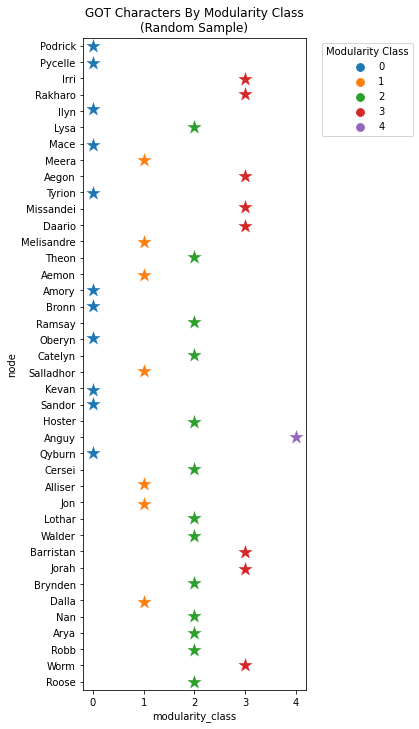

In [35]:
#Set figure size
plt.figure(figsize=(4,12))

#Plot a categorical scatter plot from the dataframe communities_df.sample(40)
ax =sns.stripplot(x='modularity_class', y='node', data=communities_df.sample(40),
              hue='modularity_class', marker='*',size=15)
#Set legend outside the plot with bbox_to_anchor
ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class\n(Random Sample)")
plt.show()

Plot all GOT characters with their modularity class indicated by a star (tak

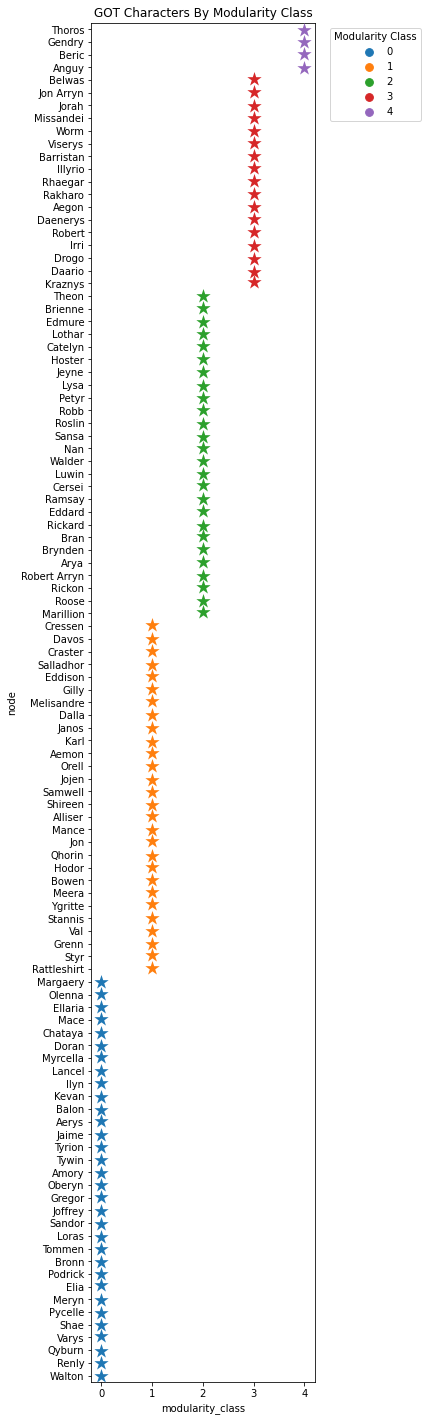

In [36]:
plt.figure(figsize=(4,25))

ax =sns.stripplot(x='modularity_class', y='node', data=communities_df,
              hue='modularity_class', marker='*',size=15)

ax.legend(loc='upper right',bbox_to_anchor=(1.5, 1), title='Modularity Class')
ax.set_title("GOT Characters By Modularity Class")
plt.show()

## All Network Metrics

Create a Pandas dataframe of all network attributes by creating a `dict`ionary of `G.nodes(data=True)`...

In [40]:
dict(G.nodes(data=True))

{'Aemon': {'degree': 5,
  'weighted_degree': 74,
  'betweenness': 0.004622508177397137,
  'modularity_class': 1},
 'Grenn': {'degree': 4,
  'weighted_degree': 81,
  'betweenness': 5.989817310572027e-05,
  'modularity_class': 1},
 'Samwell': {'degree': 15,
  'weighted_degree': 282,
  'betweenness': 0.03227262859511145,
  'modularity_class': 1},
 'Aerys': {'degree': 4,
  'weighted_degree': 37,
  'betweenness': 0.0,
  'modularity_class': 0},
 'Jaime': {'degree': 24,
  'weighted_degree': 372,
  'betweenness': 0.09994344156136246,
  'modularity_class': 0},
 'Robert': {'degree': 18,
  'weighted_degree': 128,
  'betweenness': 0.2094523840293194,
  'modularity_class': 3},
 'Tyrion': {'degree': 36,
  'weighted_degree': 551,
  'betweenness': 0.19791284320277353,
  'modularity_class': 0},
 'Tywin': {'degree': 22,
  'weighted_degree': 204,
  'betweenness': 0.06553840423231058,
  'modularity_class': 0},
 'Alliser': {'degree': 3,
  'weighted_degree': 29,
  'betweenness': 0.0,
  'modularity_class': 1

...and then [transposing it](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.T.html) (flipping the columns and rows) with `.T`

In [41]:
nodes_df = pd.DataFrame(dict(G.nodes(data=True))).T

degree  weighted_degree  betweenness  modularity_class
Aemon            5.0             74.0     0.004623               1.0
Grenn            4.0             81.0     0.000060               1.0
Samwell         15.0            282.0     0.032273               1.0
Aerys            4.0             37.0     0.000000               0.0
Jaime           24.0            372.0     0.099943               0.0
Robert          18.0            128.0     0.209452               3.0
Tyrion          36.0            551.0     0.197913               0.0
Tywin           22.0            204.0     0.065538               0.0
Alliser          3.0             29.0     0.000000               1.0
Mance           12.0            160.0     0.007276               1.0
Amory            1.0              5.0     0.000000               0.0
Oberyn           7.0             76.0     0.019580               0.0
Arya            19.0            269.0     0.079607               2.0
Anguy            2.0             15.0     0.000000               4.0
Beric            6.0             75.0     0.000609               4.0
Bran            14.0            344.0     0.063017               2.0
Brynden          8.0             55.0     0.004727               2.0
Cersei          20.0            226.0     0.026746               2.0
Gendry           4.0             59.0     0.000000               4.0
Gregor          12.0            117.0     0.005880               0.0
Joffrey         18.0            255.0     0.025434               0.0
Jon             26.0            442.0     0.229965               1.0
Rickon           6.0             81.0     0.000763               2.0
Roose            4.0             17.0     0.000263               2.0
Sandor          13.0            137.0     0.014162               0.0
Thoros           5.0             60.0     0.001926               4.0
Balon            6.0             29.0     0.000628               0.0
Loras            9.0             76.0     0.003781               0.0
Belwas           4.0             67.0     0.018868               3.0
Barristan        6.0             63.0     0.040114               3.0
Illyrio          1.0             10.0     0.000000               3.0
Hodor            4.0            177.0     0.002194               1.0
Jojen            4.0            125.0     0.000406               1.0
Luwin            2.0              8.0     0.000000               2.0
Meera            5.0            139.0     0.001992               1.0
Nan              2.0             18.0     0.000000               2.0
Theon            4.0             38.0     0.000472               2.0
Brienne          7.0            122.0     0.001538               2.0
Bronn            4.0             59.0     0.000105               0.0
Podrick          5.0             64.0     0.000836               0.0
Lothar           5.0             34.0     0.000660               2.0
Walder           8.0             87.0     0.003273               2.0
Catelyn         18.0            184.0     0.048906               2.0
Edmure           8.0             98.0     0.006317               2.0
Hoster           3.0             24.0     0.000243               2.0
Jeyne            2.0             28.0     0.000000               2.0
Lysa            10.0            108.0     0.015215               2.0
Petyr            7.0             89.0     0.001150               2.0
Robb            25.0            342.0     0.126964               2.0
Roslin           4.0             32.0     0.000068               2.0
Sansa           26.0            383.0     0.126720               2.0
Stannis         14.0            146.0     0.102700               1.0
Elia             5.0             29.0     0.002997               0.0
Ilyn             6.0             32.0     0.000000               0.0
Meryn            7.0             47.0     0.000259               0.0
Pycelle          4.0             24.0     0.000000               0.0
Shae             5.0             45.0     0.001252               0.0
Varys       

In [39]:
nodes_df.sort_values(by='betweenness', ascending=False)

degree  weighted_degree  betweenness  modularity_class
Jon             26.0            442.0     0.229965               1.0
Robert          18.0            128.0     0.209452               3.0
Tyrion          36.0            551.0     0.197913               0.0
Daenerys        14.0            232.0     0.157203               3.0
Robb            25.0            342.0     0.126964               2.0
Sansa           26.0            383.0     0.126720               2.0
Stannis         14.0            146.0     0.102700               1.0
Jaime           24.0            372.0     0.099943               0.0
Arya            19.0            269.0     0.079607               2.0
Tywin           22.0            204.0     0.065538               0.0
Bran            14.0            344.0     0.063017               2.0
Davos            5.0             87.0     0.056065               1.0
Catelyn         18.0            184.0     0.048906               2.0
Barristan        6.0             63.0     0.040114               3.0
Samwell         15.0            282.0     0.032273               1.0
Cersei          20.0            226.0     0.026746               2.0
Joffrey         18.0            255.0     0.025434               0.0
Janos            6.0             37.0     0.023559               1.0
Oberyn           7.0             76.0     0.019580               0.0
Eddard          12.0            108.0     0.019341               2.0
Kevan            6.0             50.0     0.019220               0.0
Belwas           4.0             67.0     0.018868               3.0
Craster          5.0             75.0     0.018868               1.0
Viserys          3.0             19.0     0.015644               3.0
Lysa            10.0            108.0     0.015215               2.0
Sandor          13.0            137.0     0.014162               0.0
Melisandre       4.0             62.0     0.008609               1.0
Rhaegar          6.0             42.0     0.007313               3.0
Mance           12.0            160.0     0.007276               1.0
Edmure           8.0             98.0     0.006317               2.0
Val              4.0             31.0     0.005898               1.0
Gregor          12.0            117.0     0.005880               0.0
Brynden          8.0             55.0     0.004727               2.0
Aemon            5.0             74.0     0.004623               1.0
Renly            8.0             55.0     0.004228               0.0
Loras            9.0             76.0     0.003781               0.0
Walder           8.0             87.0     0.003273               2.0
Elia             5.0             29.0     0.002997               0.0
Jorah            6.0             89.0     0.002330               3.0
Hodor            4.0            177.0     0.002194               1.0
Meera            5.0            139.0     0.001992               1.0
Thoros           5.0             60.0     0.001926               4.0
Brienne          7.0            122.0     0.001538               2.0
Shae             5.0             45.0     0.001252               0.0
Petyr            7.0             89.0     0.001150               2.0
Margaery         7.0             96.0     0.001097               0.0
Varys            7.0             49.0     0.000909               0.0
Podrick          5.0             64.0     0.000836               0.0
Rickon           6.0             81.0     0.000763               2.0
Tommen           5.0             31.0     0.000698               0.0
Lothar           5.0             34.0     0.000660               2.0
Balon            6.0             29.0     0.000628               0.0
Myrcella         4.0             18.0     0.000624               0.0
Beric            6.0             75.0     0.000609               4.0
Jon Arryn        2.0             11.0     0.000576               3.0
Theon            4.0             38.0     0.000472               2.0
Jojen            4.0            125.0     0.000406               1.0
Qhorin      